## EIA Monthly Electric Grid Data - Generation Operations
## Exploratory Data Analysis

https://www.eia.gov/electricity/gridmonitor/about

In [2]:
import pandas as pd
import numpy as np

# genops.csv was retrieved from the U.S. Energy Information Administration API using code 
# in EIA_GetData3.ipynb
csv_path = 'genops.csv'

genops = pd.read_csv(csv_path, low_memory=False)
genops.shape

#eia_data['value'] = pd.to_numeric(eia_data['value'], errors='coerce')
#eia_data['period'] = pd.to_datetime(eia_data['period'], yearfirst=True, errors='coerce')
#eia_data = eia_data.rename(columns = {'value':'MWh'})
#eia_data = eia_data[['period','respondent','respondent_name', 'type', 'type_name', 'MWh']]

(852061, 22)

In [3]:
genops = genops.drop_duplicates()
genops.shape

(852061, 22)

In [4]:
genops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852061 entries, 0 to 852060
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   period                        852061 non-null  object 
 1   plantCode                     852061 non-null  int64  
 2   plantName                     851980 non-null  object 
 3   fuel2002                      852061 non-null  object 
 4   fuelTypeDescription           852061 non-null  object 
 5   state                         850650 non-null  object 
 6   stateDescription              849168 non-null  object 
 7   primeMover                    852061 non-null  object 
 8   average-heat-content          628597 non-null  float64
 9   average-heat-content-units    336670 non-null  object 
 10  consumption-for-eg            628597 non-null  float64
 11  consumption-for-eg-units      336670 non-null  object 
 12  consumption-for-eg-btu        852061 non-nul

In [5]:
genops.head()

,period,plantCode,plantName,fuel2002,fuelTypeDescription,state,stateDescription,primeMover,average-heat-content,average-heat-content-units,...,consumption-for-eg-btu,generation,gross-generation,total-consumption,total-consumption-units,total-consumption-btu,consumption-for-eg-btu-units,generation-units,gross-generation-units,total-consumption-btu-units
0,2022-12,3,Barry,SUB,Coal,AL,Alabama,ST,0.000,MMBtu per short tons,...,0,0.00,0.00,0.0,MMBtu per short tons,0,MMBtu,megawatthours,megawatthours,MMBtu
1,2022-12,8223,Springerville,SUN,Solar,AZ,Arizona,ALL,0.000,NaN,...,8527,964.26,974.00,0.0,NaN,8527,MMBtu,megawatthours,megawatthours,MMBtu
2,2022-12,8223,Springerville,SUB,Coal,AZ,Arizona,ALL,18.053,MMBtu per short tons,...,8380726,741778.54,880021.41,464229.0,MMBtu per short tons,8380726,MMBtu,megawatthours,megawatthours,MMBtu
3,2022-12,50955,Rousselot Inc,NG,Natural Gas,MA,Massachusetts,ALL,1.030,MMBtu per Mcf,...,6491,1485.00,1560.00,67871.0,MMBtu per Mcf,69907,MMBtu,megawatthours,megawatthours,MMBtu
4,2022-12,50955,Rousselot Inc,ALL,Total,MA,Massachusetts,ALL,NaN,NaN,...,6491,1485.00,1560.00,NaN,NaN,69907,MMBtu,megawatthours,megawatthours,MMBtu


In [6]:
genops.columns = genops.columns.str.replace('-', '_')
genops['period'] = pd.to_datetime(genops['period'], yearfirst=True, errors='coerce')
genops['plantCode'] = 'P' + genops['plantCode'].astype(str)


In [7]:
genops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852061 entries, 0 to 852060
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   period                        852061 non-null  datetime64[ns]
 1   plantCode                     852061 non-null  object        
 2   plantName                     851980 non-null  object        
 3   fuel2002                      852061 non-null  object        
 4   fuelTypeDescription           852061 non-null  object        
 5   state                         850650 non-null  object        
 6   stateDescription              849168 non-null  object        
 7   primeMover                    852061 non-null  object        
 8   average_heat_content          628597 non-null  float64       
 9   average_heat_content_units    336670 non-null  object        
 10  consumption_for_eg            628597 non-null  float64       
 11  consumption_f

In [8]:
genops.head()

,period,plantCode,plantName,fuel2002,fuelTypeDescription,state,stateDescription,primeMover,average_heat_content,average_heat_content_units,...,consumption_for_eg_btu,generation,gross_generation,total_consumption,total_consumption_units,total_consumption_btu,consumption_for_eg_btu_units,generation_units,gross_generation_units,total_consumption_btu_units
0,2022-12-01,P3,Barry,SUB,Coal,AL,Alabama,ST,0.000,MMBtu per short tons,...,0,0.00,0.00,0.0,MMBtu per short tons,0,MMBtu,megawatthours,megawatthours,MMBtu
1,2022-12-01,P8223,Springerville,SUN,Solar,AZ,Arizona,ALL,0.000,NaN,...,8527,964.26,974.00,0.0,NaN,8527,MMBtu,megawatthours,megawatthours,MMBtu
2,2022-12-01,P8223,Springerville,SUB,Coal,AZ,Arizona,ALL,18.053,MMBtu per short tons,...,8380726,741778.54,880021.41,464229.0,MMBtu per short tons,8380726,MMBtu,megawatthours,megawatthours,MMBtu
3,2022-12-01,P50955,Rousselot Inc,NG,Natural Gas,MA,Massachusetts,ALL,1.030,MMBtu per Mcf,...,6491,1485.00,1560.00,67871.0,MMBtu per Mcf,69907,MMBtu,megawatthours,megawatthours,MMBtu
4,2022-12-01,P50955,Rousselot Inc,ALL,Total,MA,Massachusetts,ALL,NaN,NaN,...,6491,1485.00,1560.00,NaN,NaN,69907,MMBtu,megawatthours,megawatthours,MMBtu


In [9]:
genops[genops.plantCode == 'P59157']

,period,plantCode,plantName,fuel2002,fuelTypeDescription,state,stateDescription,primeMover,average_heat_content,average_heat_content_units,...,consumption_for_eg_btu,generation,gross_generation,total_consumption,total_consumption_units,total_consumption_btu,consumption_for_eg_btu_units,generation_units,gross_generation_units,total_consumption_btu_units
115740,2021-09-01,P59157,Pecan PV1,SUN,Solar,NC,North Carolina,PV,0.0,NaN,...,7740,875.18,875.18,0.0,NaN,7740,MMBtu,megawatthours,megawatthours,MMBtu
115741,2021-09-01,P59157,Pecan PV1,SUN,Solar,NC,North Carolina,ALL,0.0,NaN,...,7740,875.18,875.18,0.0,NaN,7740,MMBtu,megawatthours,megawatthours,MMBtu
115742,2021-09-01,P59157,Pecan PV1,ALL,Total,NC,North Carolina,ALL,NaN,NaN,...,7740,875.18,875.18,NaN,NaN,7740,MMBtu,megawatthours,megawatthours,MMBtu
132652,2021-08-01,P59157,Pecan PV1,SUN,Solar,NC,North Carolina,PV,0.0,NaN,...,8274,935.59,935.59,0.0,NaN,8274,MMBtu,megawatthours,megawatthours,MMBtu
132653,2021-08-01,P59157,Pecan PV1,SUN,Solar,NC,North Carolina,ALL,0.0,NaN,...,8274,935.59,935.59,0.0,NaN,8274,MMBtu,megawatthours,megawatthours,MMBtu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820715,2018-07-01,P59157,Pecan PV1,SUN,Solar,NC,North Carolina,ALL,0.0,NaN,...,8784,964.89,964.89,0.0,NaN,8784,MMBtu,megawatthours,megawatthours,MMBtu
820716,2018-07-01,P59157,Pecan PV1,ALL,Total,NC,North Carolina,ALL,NaN,NaN,...,8784,964.89,964.89,NaN,NaN,8784,MMBtu,megawatthours,megawatthours,MMBtu
847322,2018-01-01,P59157,Pecan PV1,ALL,Total,NC,North Carolina,ALL,NaN,NaN,...,5600,615.07,615.07,NaN,NaN,5600,MMBtu,megawatthours,megawatthours,MMBtu
847323,2018-01-01,P59157,Pecan PV1,SUN,Solar,NC,North Carolina,ALL,0.0,NaN,...,5600,615.07,615.07,0.0,NaN,5600,MMBtu,megawatthours,megawatthours,MMBtu


In [10]:
genops.describe(include=['O']).T

,count,unique,top,freq
plantCode,852061,11489,P99999,1330
plantName,851980,11740,State-Fuel Level Increment,1330
fuel2002,852061,42,ALL,223464
fuelTypeDescription,852061,19,Total,223464
state,850650,52,CA,111039
stateDescription,849168,51,California,111039
primeMover,852061,19,ALL,522332
average_heat_content_units,336670,4,MMBtu per Mcf,159952
consumption_for_eg_units,336670,4,Mcf,159952
total_consumption_units,336670,4,MMBtu per Mcf,159952


In [11]:
genops.describe().T

,count,mean,min,25%,50%,75%,max,std
period,852061,2020-03-09 00:44:29.791951104,2018-01-01 00:00:00,2019-02-01 00:00:00,2020-03-01 00:00:00,2021-05-01 00:00:00,2022-12-01 00:00:00,NaN
average_heat_content,628597.0,1.7548,0.0,0.0,0.0,1.03,37.4,4.337507
consumption_for_eg,628597.0,83518.856918,0.0,0.0,0.0,1031.0,127886215.0,541963.229557
consumption_for_eg_btu,852061.0,287022.124615,0.0,556.0,5720.0,60078.0,365985262.0,1532866.588223
generation,852061.0,31240.485951,-154605.0,57.98,651.85,7119.32,40672520.52,159519.776614
gross_generation,852061.0,32890.356386,0.0,80.46,697.31,7766.55,41560782.32,165800.070455
total_consumption,628597.0,97184.810424,0.0,0.0,0.0,1891.0,155973481.0,631164.999321
total_consumption_btu,852061.0,306806.322376,0.0,644.0,6272.0,82915.0,440331497.0,1616138.634292


In [12]:
genops.fuelTypeDescription.unique()

array(['Coal', 'Solar', 'Natural Gas', 'Total', 'Waste Coal',
       'Distillate Fuel Oil', 'Hydroelectric Conventional',
       'Petroleum Coke', 'Wind', 'Municiapl Landfill Gas', 'Other Gases',
       'Other', 'Nuclear', 'Residual Fuel Oil',
       'Waste Oil and Other Oils', 'Wood Waste Solids',
       'other renewables', 'Hydroelectric Pumped Storage', 'Geothermal'],
      dtype=object)

In [13]:
genops.fuel2002.unique()

array(['SUB', 'SUN', 'NG', 'ALL', 'WC', 'DFO', 'BIT', 'WAT', 'PC', 'RC',
       'WND', 'LFG', 'LIG', 'OG', 'MWH', 'NUC', 'RFO', 'PG', 'OTH', 'WDS',
       'MSN', 'MSB', 'PUR', 'TDF', 'SLW', 'OBL', 'BLQ', 'WH', 'GEO', 'AB',
       'WO', 'SGP', 'OBS', 'JF', 'OBG', 'KER', 'H2', 'BFG', 'SGC', 'WDL',
       'ANT', 'SC'], dtype=object)

<Axes: xlabel='period'>

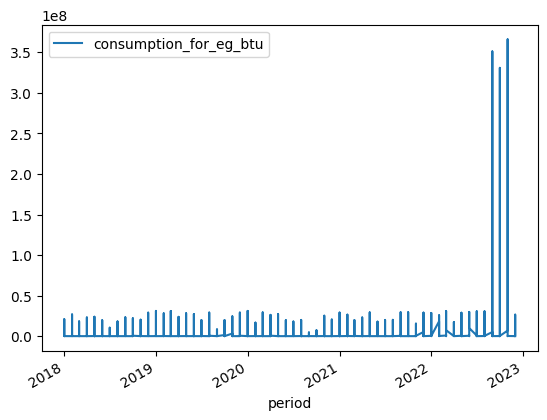

In [14]:
genops.plot(x='period', y='consumption_for_eg_btu')

<Axes: >

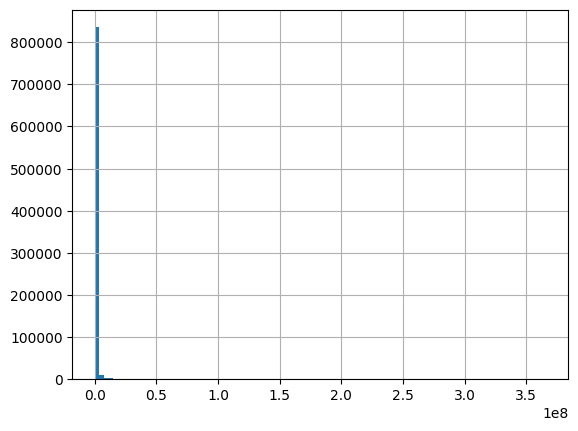

In [15]:
genops.consumption_for_eg_btu.hist(bins=100)

In [16]:
#group by BA using gencap data
import json
plant_ba_dict_fname = 'plant_ba_dict.json'
with open(plant_ba_dict_fname, "r") as infile:
    plant_ba_dict = json.load(infile)
print(plant_ba_dict)

{'P50663': 'PJM', 'P59157': 'CPLE', 'P59518': 'PJM', 'P59517': 'PJM', 'P59516': 'PJM', 'P59515': 'PJM', 'P59156': 'CPLE', 'P64655': 'WACM', 'P64654': 'WACM', 'P64653': 'WACM', 'P64652': 'WACM', 'P64651': 'WACM', 'P64650': 'WACM', 'P64649': 'WACM', 'P64648': 'WACM', 'P64647': 'PJM', 'P64646': 'PJM', 'P64645': 'PJM', 'P64644': 'PJM', 'P64643': 'PJM', 'P64642': 'PJM', 'P64608': 'PJM', 'P64606': 'PJM', 'P64605': 'ISNE', 'P63646': 'NYIS', 'P63645': 'PJM', 'P58102': 'CISO', 'P58101': 'CISO', 'P58096': 'PJM', 'P58095': 'PJM', 'P58094': 'PJM', 'P58093': 'PJM', 'P58085': 'CISO', 'P58091': 'PJM', 'P58084': 'ISNE', 'P58080': 'ERCO', 'P58079': 'PJM', 'P65580': 'ERCO', 'P61652': 'MISO', 'P56544': 'MISO', 'P61028': 'PJM', 'P50624': 'CISO', 'P59312': 'SWPP', 'P59311': 'SWPP', 'P64483': 'MISO', 'P64482': 'MISO', 'P64479': 'MISO', 'P64154': 'MISO', 'P64153': 'MISO', 'P63987': 'MISO', 'P63726': 'MISO', 'P63725': 'MISO', 'P63724': 'MISO', 'P63249': 'MISO', 'P63247': 'MISO', 'P63010': 'MISO', 'P63009': 'M

In [17]:
genops['ba_code'] = genops['plantCode'].map(plant_ba_dict)
genops.head()

,period,plantCode,plantName,fuel2002,fuelTypeDescription,state,stateDescription,primeMover,average_heat_content,average_heat_content_units,...,generation,gross_generation,total_consumption,total_consumption_units,total_consumption_btu,consumption_for_eg_btu_units,generation_units,gross_generation_units,total_consumption_btu_units,ba_code
0,2022-12-01,P3,Barry,SUB,Coal,AL,Alabama,ST,0.000,MMBtu per short tons,...,0.00,0.00,0.0,MMBtu per short tons,0,MMBtu,megawatthours,megawatthours,MMBtu,SOCO
1,2022-12-01,P8223,Springerville,SUN,Solar,AZ,Arizona,ALL,0.000,NaN,...,964.26,974.00,0.0,NaN,8527,MMBtu,megawatthours,megawatthours,MMBtu,TEPC
2,2022-12-01,P8223,Springerville,SUB,Coal,AZ,Arizona,ALL,18.053,MMBtu per short tons,...,741778.54,880021.41,464229.0,MMBtu per short tons,8380726,MMBtu,megawatthours,megawatthours,MMBtu,TEPC
3,2022-12-01,P50955,Rousselot Inc,NG,Natural Gas,MA,Massachusetts,ALL,1.030,MMBtu per Mcf,...,1485.00,1560.00,67871.0,MMBtu per Mcf,69907,MMBtu,megawatthours,megawatthours,MMBtu,ISNE
4,2022-12-01,P50955,Rousselot Inc,ALL,Total,MA,Massachusetts,ALL,NaN,NaN,...,1485.00,1560.00,NaN,NaN,69907,MMBtu,megawatthours,megawatthours,MMBtu,ISNE


In [18]:
genops.isna().sum()

period                               0
plantCode                            0
plantName                           81
fuel2002                             0
fuelTypeDescription                  0
state                             1411
stateDescription                  2893
primeMover                           0
average_heat_content            223464
average_heat_content_units      515391
consumption_for_eg              223464
consumption_for_eg_units        515391
consumption_for_eg_btu               0
generation                           0
gross_generation                     0
total_consumption               223464
total_consumption_units         515391
total_consumption_btu                0
consumption_for_eg_btu_units         0
generation_units                     0
gross_generation_units               0
total_consumption_btu_units          0
ba_code                          25633
dtype: int64

In [19]:
genops[genops.ba_code.isna()]['state'].unique()

array(['HI', 'TX', 'CA', 'CO', 'WI', 'MI', 'GA', 'AK', 'PR', 'NV', 'KY',
       'WV', 'OH', 'PA', 'RI', 'MS', 'IL', 'SC', 'AL', 'NJ', 'TN', 'FL',
       nan, 'NY', 'VA', 'WA', 'LA', 'MN'], dtype=object)

In [20]:
genops['consumption_for_eg_btu_units'].unique()

array(['MMBtu'], dtype=object)

In [21]:
genops['generation_units'].unique()

array(['megawatthours'], dtype=object)

In [22]:
genops.shape

(852061, 23)

In [23]:
25633/852061
# ~3% of genops lines not assigned to BA

0.030083526883638613

In [24]:
genops.dropna(subset='ba_code', inplace=True)

In [25]:
genops.shape

(826428, 23)

In [26]:
genops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 826428 entries, 0 to 852060
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   period                        826428 non-null  datetime64[ns]
 1   plantCode                     826428 non-null  object        
 2   plantName                     826425 non-null  object        
 3   fuel2002                      826428 non-null  object        
 4   fuelTypeDescription           826428 non-null  object        
 5   state                         826425 non-null  object        
 6   stateDescription              826425 non-null  object        
 7   primeMover                    826428 non-null  object        
 8   average_heat_content          608746 non-null  float64       
 9   average_heat_content_units    320872 non-null  object        
 10  consumption_for_eg            608746 non-null  float64       
 11  consumption_for_eg

In [27]:
genops['generation'].describe()

count    8.264280e+05
mean     3.150936e+04
std      1.361907e+05
min     -1.546050e+05
25%      6.867750e+01
50%      6.735900e+02
75%      7.438330e+03
max      2.978263e+06
Name: generation, dtype: float64

In [28]:
genout = genops[['period', 'ba_code', 'fuel2002', 'consumption_for_eg_btu', 'generation']]
genout = genout.rename(columns={'fuel2002':'energy_src', 'consumption_for_eg_btu': \
                                'consumed_mbtu', 'generation':'gen_mwh'})
genout.head()

,period,ba_code,energy_src,consumed_mbtu,gen_mwh
0,2022-12-01,SOCO,SUB,0,0.00
1,2022-12-01,TEPC,SUN,8527,964.26
2,2022-12-01,TEPC,SUB,8380726,741778.54
3,2022-12-01,ISNE,NG,6491,1485.00
4,2022-12-01,ISNE,ALL,6491,1485.00


In [29]:
genout = genout[genout.energy_src != 'ALL'].reset_index(drop=True)
genout.head()

,period,ba_code,energy_src,consumed_mbtu,gen_mwh
0,2022-12-01,SOCO,SUB,0,0.00
1,2022-12-01,TEPC,SUN,8527,964.26
2,2022-12-01,TEPC,SUB,8380726,741778.54
3,2022-12-01,ISNE,NG,6491,1485.00
4,2022-12-01,PACE,WC,403061,34204.33


In [30]:
genout[genout.energy_src == 'SUN'].describe()

,period,consumed_mbtu,gen_mwh
count,152380,1.523800e+05,152380.000000
mean,2020-03-30 00:39:56.156975872,2.189176e+04,2464.578232
min,2018-01-01 00:00:00,0.000000e+00,0.000000
25%,2019-02-01 00:00:00,1.749000e+03,196.590000
50%,2020-04-01 00:00:00,3.659000e+03,411.365000
75%,2021-05-01 00:00:00,8.806000e+03,989.720000
max,2022-12-01 00:00:00,1.246365e+06,136903.000000
std,NaN,6.437914e+04,7250.864004


In [31]:
# wtf does EIA really track amount of 'SUN' fuel consumed?

In [32]:
genout.head()

,period,ba_code,energy_src,consumed_mbtu,gen_mwh
0,2022-12-01,SOCO,SUB,0,0.00
1,2022-12-01,TEPC,SUN,8527,964.26
2,2022-12-01,TEPC,SUB,8380726,741778.54
3,2022-12-01,ISNE,NG,6491,1485.00
4,2022-12-01,PACE,WC,403061,34204.33


In [33]:
esrc_co2_dict_fname = 'esrc_co2_dict.json'
with open(esrc_co2_dict_fname, "r") as infile:
    esrc_co2_dict = json.load(infile)
e_co2 = {}
for k, v in esrc_co2_dict.items():
    e_co2[k] = v['kg_co2_per_million_btu']
#print(e_co2)
genout['co2_kton'] = genout['consumed_mbtu']*genout['energy_src'].map(e_co2)/1e6

In [34]:
genout.head(10)

,period,ba_code,energy_src,consumed_mbtu,gen_mwh,co2_kton
0,2022-12-01,SOCO,SUB,0,0.00,0.000000
1,2022-12-01,TEPC,SUN,8527,964.26,0.000000
2,2022-12-01,TEPC,SUB,8380726,741778.54,814.019916
3,2022-12-01,ISNE,NG,6491,1485.00,0.343439
4,2022-12-01,PACE,WC,403061,34204.33,37.581408
5,2022-12-01,PACE,DFO,1669,141.67,0.123740
6,2022-12-01,PACE,WC,403061,34204.33,37.581408
7,2022-12-01,PACE,DFO,1669,141.67,0.123740
8,2022-12-01,TEC,NG,5105,40.54,0.270106
9,2022-12-01,TEC,DFO,687,5.46,0.050934


In [35]:
import json

BA_dict_fname = 'BA_dict.json'
with open(BA_dict_fname, "r") as infile:
    BA_dict = json.load(infile)
print(BA_dict)

{'YAD': {'BA_Name': 'Alcoa Power Generating, Inc. - Yadkin Division', 'Time_Zone': 'Eastern', 'Region_Country_Code': 'CAR', 'Region_Country_Name': 'Carolinas', 'Generation_Only_BA': 'Yes', 'Demand_by_BA_Subregion': 'No', 'US_BA': 'Yes', 'Active_BA': 'Yes', 'Activation_Date': '', 'Retirement_Date': ''}, 'AZPS': {'BA_Name': 'Arizona Public Service Company', 'Time_Zone': 'Arizona', 'Region_Country_Code': 'SW', 'Region_Country_Name': 'Southwest', 'Generation_Only_BA': 'No', 'Demand_by_BA_Subregion': 'No', 'US_BA': 'Yes', 'Active_BA': 'Yes', 'Activation_Date': '', 'Retirement_Date': ''}, 'DEAA': {'BA_Name': 'Arlington Valley, LLC', 'Time_Zone': 'Arizona', 'Region_Country_Code': 'SW', 'Region_Country_Name': 'Southwest', 'Generation_Only_BA': 'Yes', 'Demand_by_BA_Subregion': 'No', 'US_BA': 'Yes', 'Active_BA': 'Yes', 'Activation_Date': '', 'Retirement_Date': ''}, 'AECI': {'BA_Name': 'Associated Electric Cooperative, Inc.', 'Time_Zone': 'Central', 'Region_Country_Code': 'MIDW', 'Region_Country_

In [36]:
#remove non-US BAs, and larger regions
genout = genout[genout.ba_code.isin(BA_dict.keys())]
genout.shape

(607613, 6)

In [37]:
genout = genout.groupby(['period', 'ba_code'], as_index = False)[['gen_mwh','co2_kton']] \
    .aggregate('sum')
genout.head()

,period,ba_code,gen_mwh,co2_kton
0,2018-01-01,AECI,958175.40,371.621725
1,2018-01-01,AVA,33918.92,0.131717
2,2018-01-01,AZPS,488107.34,499.032994
3,2018-01-01,BANC,26750.40,0.000000
4,2018-01-01,BPAT,468206.84,6.600204


In [38]:
conditions = [(genout.gen_mwh <= 0), (genout.gen_mwh > 0)]
results = [float('nan'), (genout['co2_kton']/genout['gen_mwh'])*1e6]
genout['kg_co2_per_mwh'] = np.select(conditions, results)
genout.head()

,period,ba_code,gen_mwh,co2_kton,kg_co2_per_mwh
0,2018-01-01,AECI,958175.40,371.621725,387.843107
1,2018-01-01,AVA,33918.92,0.131717,3.883279
2,2018-01-01,AZPS,488107.34,499.032994,1022.383712
3,2018-01-01,BANC,26750.40,0.000000,0.000000
4,2018-01-01,BPAT,468206.84,6.600204,14.096769


In [39]:
genout.describe()

,period,gen_mwh,co2_kton,kg_co2_per_mwh
count,3299,3.299000e+03,3299.000000,3216.000000
mean,2020-06-12 14:51:19.478629888,5.254172e+06,2036.748124,321.258776
min,2018-01-01 00:00:00,-4.179400e+04,0.000000,0.000000
25%,2019-03-01 00:00:00,1.838993e+05,0.614021,14.167520
50%,2020-06-01 00:00:00,9.203652e+05,252.421235,292.633962
75%,2021-09-01 00:00:00,3.569212e+06,1488.785239,481.556032
max,2022-12-01 00:00:00,1.514239e+08,68552.298028,1846.300000
std,NaN,1.381209e+07,5970.128538,297.677103


array([[<Axes: title={'center': 'period'}>,
        <Axes: title={'center': 'gen_mwh'}>],
       [<Axes: title={'center': 'co2_kton'}>,
        <Axes: title={'center': 'kg_co2_per_mwh'}>]], dtype=object)

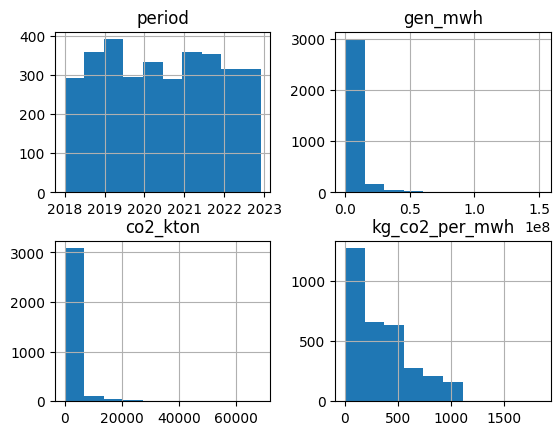

In [40]:
genout.hist()

In [41]:
# save genout to csv
genout_fname = 'genout.csv'
with open(genout_fname, 'w') as outfile:
    genout.to_csv(outfile)